In [1]:
import pandas as pd
raw_data = pd.read_csv('C:/jupiterr/survey_results_public.csv')
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73268 entries, 0 to 73267
Data columns (total 79 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ResponseId                      73268 non-null  int64  
 1   MainBranch                      73268 non-null  object 
 2   Employment                      71709 non-null  object 
 3   RemoteWork                      58958 non-null  object 
 4   CodingActivities                58899 non-null  object 
 5   EdLevel                         71571 non-null  object 
 6   LearnCode                       71580 non-null  object 
 7   LearnCodeOnline                 50685 non-null  object 
 8   LearnCodeCoursesCert            29389 non-null  object 
 9   YearsCode                       71331 non-null  object 
 10  YearsCodePro                    51833 non-null  object 
 11  DevType                         61302 non-null  object 
 12  OrgSize                         

In [2]:
raw_data.head()

,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,...,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN
2,3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.0
3,4,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,215232.0
4,5,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow;O...,NaN,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN


In [3]:
raw_data['DevType']

0                                                      NaN
1                                                      NaN
2        Data scientist or machine learning specialist;...
3                                    Developer, full-stack
4        Developer, front-end;Developer, full-stack;Dev...
                               ...                        
73263                                  Developer, back-end
73264        Data scientist or machine learning specialist
73265    Developer, full-stack;Developer, desktop or en...
73266    Developer, front-end;Developer, desktop or ent...
73267    Developer, front-end;Engineer, data;Engineer, ...
Name: DevType, Length: 73268, dtype: object

In [4]:
dev_type = raw_data['DevType'].str.split(';')
dev_type

0                                                      NaN
1                                                      NaN
2        [Data scientist or machine learning specialist...
3                                  [Developer, full-stack]
4        [Developer, front-end, Developer, full-stack, ...
                               ...                        
73263                                [Developer, back-end]
73264      [Data scientist or machine learning specialist]
73265    [Developer, full-stack, Developer, desktop or ...
73266    [Developer, front-end, Developer, desktop or e...
73267    [Developer, front-end, Engineer, data, Enginee...
Name: DevType, Length: 73268, dtype: object

In [5]:
dev_type.dropna(inplace=True)
dev_type

2        [Data scientist or machine learning specialist...
3                                  [Developer, full-stack]
4        [Developer, front-end, Developer, full-stack, ...
7                         [Developer, full-stack, Student]
8                                    [Developer, back-end]
                               ...                        
73263                                [Developer, back-end]
73264      [Data scientist or machine learning specialist]
73265    [Developer, full-stack, Developer, desktop or ...
73266    [Developer, front-end, Developer, desktop or e...
73267    [Developer, front-end, Engineer, data, Enginee...
Name: DevType, Length: 61302, dtype: object

In [6]:
exploded_dev_type = dev_type.explode()
exploded_dev_type

2        Data scientist or machine learning specialist
2                                 Developer, front-end
2                                       Engineer, data
2                           Engineer, site reliability
3                                Developer, full-stack
                             ...                      
73267                         Data or business analyst
73267                                         Designer
73267                                        Scientist
73267                                  Product manager
73267                             System administrator
Name: DevType, Length: 164790, dtype: object

In [7]:
exploded_dev_type.unique()

array(['Data scientist or machine learning specialist',
       'Developer, front-end', 'Engineer, data',
       'Engineer, site reliability', 'Developer, full-stack',
       'Developer, back-end',
       'Developer, desktop or enterprise applications',
       'Developer, QA or test', 'Student', 'Developer, mobile',
       'Educator', 'Engineering manager', 'Database administrator',
       'Academic researcher', 'DevOps specialist',
       'Other (please specify):',
       'Developer, embedded applications or devices',
       'Developer, game or graphics', 'Project manager',
       'Cloud infrastructure engineer', 'Data or business analyst',
       'Designer', 'Scientist', 'Product manager',
       'Senior Executive (C-Suite, VP, etc.)', 'System administrator',
       'Blockchain', 'Marketing or sales professional',
       'Security professional'], dtype=object)

In [8]:
data_analyst_data = raw_data[raw_data['DevType'].isin(['Data scientist or machine learning specialist',
                                                       'Data or business analyst'])]
data_analyst_data['DevType']

240                           Data or business analyst
400                           Data or business analyst
463      Data scientist or machine learning specialist
1089     Data scientist or machine learning specialist
1704     Data scientist or machine learning specialist
                             ...                      
73053                         Data or business analyst
73054                         Data or business analyst
73064    Data scientist or machine learning specialist
73204                         Data or business analyst
73264    Data scientist or machine learning specialist
Name: DevType, Length: 742, dtype: object

In [9]:
languages = data_analyst_data['LanguageHaveWorkedWith']
languages

240                   HTML/CSS;Python;Ruby;SQL;VBA
400                      Bash/Shell;C++;Python;SQL
463                          Bash/Shell;Python;SQL
1089                                        Python
1704             Elixir;Python;Rust;SQL;TypeScript
                           ...                    
73053                        PowerShell;Python;SQL
73054                                            R
73064                        Java;Python;Scala;SQL
73204          Bash/Shell;HTML/CSS;Julia;R;SQL;VBA
73264    Bash/Shell;HTML/CSS;JavaScript;Python;SQL
Name: LanguageHaveWorkedWith, Length: 742, dtype: object

In [10]:
languages = languages.str.split(';')
languages

240                   [HTML/CSS, Python, Ruby, SQL, VBA]
400                       [Bash/Shell, C++, Python, SQL]
463                            [Bash/Shell, Python, SQL]
1089                                            [Python]
1704             [Elixir, Python, Rust, SQL, TypeScript]
                              ...                       
73053                          [PowerShell, Python, SQL]
73054                                                [R]
73064                         [Java, Python, Scala, SQL]
73204         [Bash/Shell, HTML/CSS, Julia, R, SQL, VBA]
73264    [Bash/Shell, HTML/CSS, JavaScript, Python, SQL]
Name: LanguageHaveWorkedWith, Length: 742, dtype: object

In [11]:
exploded_languages = languages.explode()
exploded_languages

240        HTML/CSS
240          Python
240            Ruby
240             SQL
240             VBA
            ...    
73264    Bash/Shell
73264      HTML/CSS
73264    JavaScript
73264        Python
73264           SQL
Name: LanguageHaveWorkedWith, Length: 2566, dtype: object

In [12]:
size_by_language = exploded_languages.groupby(exploded_languages).size()

size_by_language.sort_values(ascending=False, inplace=True)
size_by_language

LanguageHaveWorkedWith
Python         624
SQL            440
R              213
Bash/Shell     174
JavaScript     169
HTML/CSS       147
C++            113
Java            85
VBA             70
C               66
C#              50
PowerShell      46
TypeScript      41
MATLAB          41
Julia           39
SAS             33
Scala           29
Go              22
Rust            22
PHP             16
Swift           10
Kotlin          10
Ruby             9
Dart             9
Assembly         8
Haskell          8
Lua              8
Perl             7
LISP             7
Clojure          6
APL              5
Objective-C      5
Solidity         4
Groovy           4
Fortran          3
Elixir           2
Delphi           2
F#               2
Crystal          1
COBOL            1
Erlang           1
OCaml            1
Name: LanguageHaveWorkedWith, dtype: int64

In [13]:
frame = {'languages' : size_by_language.index, 'count' : size_by_language.values}
size_by_language_df = pd.DataFrame(frame)
size_by_language_df.head()

,languages,count
0,Python,624
1,SQL,440
2,R,213
3,Bash/Shell,174
4,JavaScript,169


In [14]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [15]:
size_by_language.to_dict()

{'Python': 624,
 'SQL': 440,
 'R': 213,
 'Bash/Shell': 174,
 'JavaScript': 169,
 'HTML/CSS': 147,
 'C++': 113,
 'Java': 85,
 'VBA': 70,
 'C': 66,
 'C#': 50,
 'PowerShell': 46,
 'TypeScript': 41,
 'MATLAB': 41,
 'Julia': 39,
 'SAS': 33,
 'Scala': 29,
 'Go': 22,
 'Rust': 22,
 'PHP': 16,
 'Swift': 10,
 'Kotlin': 10,
 'Ruby': 9,
 'Dart': 9,
 'Assembly': 8,
 'Haskell': 8,
 'Lua': 8,
 'Perl': 7,
 'LISP': 7,
 'Clojure': 6,
 'APL': 5,
 'Objective-C': 5,
 'Solidity': 4,
 'Groovy': 4,
 'Fortran': 3,
 'Elixir': 2,
 'Delphi': 2,
 'F#': 2,
 'Crystal': 1,
 'COBOL': 1,
 'Erlang': 1,
 'OCaml': 1}

In [16]:
WC = WordCloud(background_color='white').generate_from_frequencies(size_by_language.to_dict())
WC

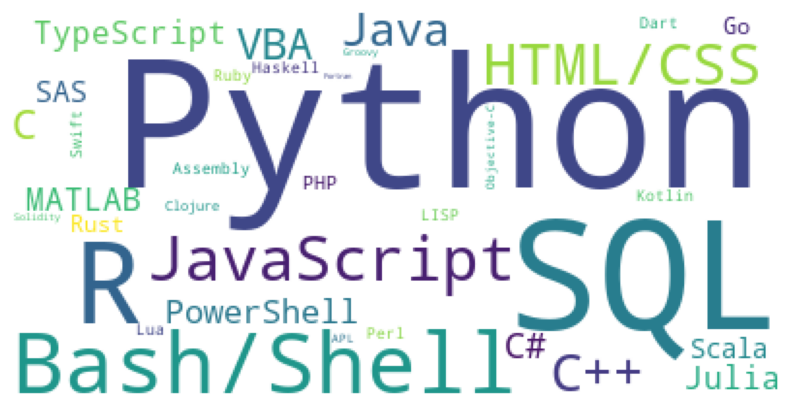

In [17]:
plt.rcParams['figure.figsize'] = (10, 10)
plt.imshow(WC)
plt.axis('off')
plt.show()

In [18]:
import plotly.express as px
fig = px.treemap(size_by_language_df, path=['languages'], values='count')
fig.show()

In [19]:
languages.dropna(inplace=True)
lang_list = languages.to_list()
lang_list[:10]

[['HTML/CSS', 'Python', 'Ruby', 'SQL', 'VBA'],
 ['Bash/Shell', 'C++', 'Python', 'SQL'],
 ['Bash/Shell', 'Python', 'SQL'],
 ['Python'],
 ['Elixir', 'Python', 'Rust', 'SQL', 'TypeScript'],
 ['Python'],
 ['Bash/Shell',
  'C++',
  'HTML/CSS',
  'JavaScript',
  'Python',
  'Rust',
  'SQL',
  'TypeScript'],
 ['Python', 'SQL'],
 ['Bash/Shell', 'Go', 'HTML/CSS', 'Python'],
 ['Bash/Shell', 'Python', 'Rust']]

In [20]:
target_langs = ['Python','SQL' ,'R', 'MATLAB', 'Go', 'SAS', 'Scala', 'Julia', 'JavaScript', 'Java']


In [21]:
revised_lang_list = []
for lang in lang_list:
    filtered = [x for x in lang if x in target_langs]
    revised_lang_list.append(filtered)
revised_lang_list

[['Python', 'SQL'],
 ['Python', 'SQL'],
 ['Python', 'SQL'],
 ['Python'],
 ['Python', 'SQL'],
 ['Python'],
 ['JavaScript', 'Python', 'SQL'],
 ['Python', 'SQL'],
 ['Go', 'Python'],
 ['Python'],
 ['Python'],
 ['Go', 'Java'],
 ['JavaScript', 'Python'],
 ['Python', 'R', 'SQL'],
 ['Julia', 'Python', 'R'],
 ['Python', 'SQL'],
 ['JavaScript', 'Python'],
 ['Python', 'SQL'],
 ['Julia', 'Python', 'R', 'SQL'],
 ['Python'],
 ['Python', 'R', 'SAS', 'SQL'],
 ['Python'],
 ['JavaScript', 'Python', 'SQL'],
 ['JavaScript', 'Python', 'R', 'SAS', 'SQL'],
 ['Python', 'Scala', 'SQL'],
 ['Python', 'R'],
 ['Python', 'R'],
 ['JavaScript', 'Python', 'R', 'SQL'],
 ['Python'],
 ['Python'],
 ['Python', 'R', 'SQL'],
 ['JavaScript', 'Python'],
 ['SQL'],
 ['Python', 'R', 'SQL'],
 ['Python', 'SQL'],
 ['Python'],
 ['Python', 'R', 'SQL'],
 ['Python'],
 ['Python'],
 ['Julia', 'Python', 'R', 'SQL'],
 ['Java', 'Python'],
 ['Python'],
 ['Python'],
 ['JavaScript', 'Python', 'SQL'],
 ['Java', 'JavaScript', 'Python'],
 ['JavaSc

In [22]:
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(revised_lang_list).transform(revised_lang_list)
te_ary

array([[False, False, False, ..., False,  True, False],
       [False, False, False, ..., False,  True, False],
       [False, False, False, ..., False,  True, False],
       ...,
       [False,  True, False, ..., False,  True,  True],
       [False, False, False, ..., False,  True, False],
       [False, False,  True, ..., False,  True, False]], shape=(729, 10))

In [23]:
new_languages = pd.DataFrame(te_ary, columns=te.columns_)
new_languages

,Go,Java,JavaScript,Julia,MATLAB,Python,R,SAS,SQL,Scala
0,False,False,False,False,False,True,False,False,True,False
1,False,False,False,False,False,True,False,False,True,False
2,False,False,False,False,False,True,False,False,True,False
3,False,False,False,False,False,True,False,False,False,False
4,False,False,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...
724,False,False,False,False,False,True,False,False,True,False
725,False,False,False,False,False,False,True,False,False,False
726,False,True,False,False,False,True,False,False,True,True
727,False,False,False,True,False,False,True,False,True,False


In [24]:
from mlxtend.frequent_patterns import apriori, association_rules
freq_items = apriori(new_languages, min_support=0.01, use_colnames=True, verbose=1)

Processing 55 combinations | Sampling itemset size 54


In [25]:
freq_items.sort_values(['support'], ascending=False).head(20)

,support,itemsets
5,0.855967,(Python)
8,0.603567,(SQL)
32,0.517147,"(SQL, Python)"
6,0.292181,(R)
30,0.237311,"(Python, R)"
2,0.231824,(JavaScript)
35,0.213992,"(SQL, R)"
20,0.211248,"(JavaScript, Python)"
64,0.182442,"(SQL, R, Python)"
22,0.160494,"(SQL, JavaScript)"


In [26]:
freq_items['length'] = freq_items['itemsets'].apply(lambda x: len(x))
freq_items

,support,itemsets,length
0,0.030178,(Go),1
1,0.116598,(Java),1
2,0.231824,(JavaScript),1
3,0.053498,(Julia),1
4,0.056241,(MATLAB),1
...,...,...,...
78,0.017833,"(SQL, Julia, R, Python)",4
79,0.019204,"(MATLAB, SQL, R, Python)",4
80,0.021948,"(SQL, SAS, R, Python)",4
81,0.012346,"(SQL, R, Scala, Python)",4


In [27]:
rules = association_rules(freq_items, min_threshold=0.01)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(JavaScript),(Go),0.231824,0.030178,0.013717,0.059172,1.960732,1.0,0.006721,1.030817,0.637857,0.055249,0.029895,0.256859
1,(Go),(JavaScript),0.030178,0.231824,0.013717,0.454545,1.960732,1.0,0.006721,1.408322,0.505233,0.055249,0.289935,0.256859
2,(Python),(Go),0.855967,0.030178,0.028807,0.033654,1.115166,1.0,0.002975,1.003597,0.717007,0.033600,0.003584,0.494100
3,(Go),(Python),0.030178,0.855967,0.028807,0.954545,1.115166,1.0,0.002975,3.168724,0.106486,0.033600,0.684416,0.494100
4,(SQL),(Go),0.603567,0.030178,0.017833,0.029545,0.979029,1.0,-0.000382,0.999348,-0.051263,0.028953,-0.000653,0.310227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437,(Java),"(JavaScript, R, SQL, Python)",0.116598,0.048011,0.013717,0.117647,2.450420,1.0,0.008119,1.078921,0.670031,0.090909,0.073148,0.201681
438,(JavaScript),"(Java, R, SQL, Python)",0.231824,0.016461,0.013717,0.059172,3.594675,1.0,0.009901,1.045397,0.939643,0.058480,0.043426,0.446252
439,(R),"(Java, JavaScript, SQL, Python)",0.292181,0.043896,0.013717,0.046948,1.069542,1.0,0.000892,1.003203,0.091860,0.042553,0.003193,0.179724
440,(Python),"(Java, JavaScript, R, SQL)",0.855967,0.013717,0.013717,0.016026,1.168269,1.0,0.001976,1.002346,1.000000,0.016026,0.002340,0.508013


In [28]:
fig = px.scatter(rules['support'], rules['confidence'], size=rules['lift'], color=rules['lift'])
fig.update_layout(xaxis_title='Support', yaxis_title='Confidence', font_family='Courier New', font_color='blue', title_font_family='Times New Roman', title_font_color='red', title=('Support vs Confidence'))
fig.show()

In [29]:
rules['antecedents_str'] = rules['antecedents'].apply(lambda x: ','.join(list(x)))
rules['consequents_str'] = rules['consequents'].apply(lambda x: ','.join(list(x)))
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski,antecedents_str,consequents_str
0,(JavaScript),(Go),0.231824,0.030178,0.013717,0.059172,1.960732,1.0,0.006721,1.030817,0.637857,0.055249,0.029895,0.256859,JavaScript,Go
1,(Go),(JavaScript),0.030178,0.231824,0.013717,0.454545,1.960732,1.0,0.006721,1.408322,0.505233,0.055249,0.289935,0.256859,Go,JavaScript
2,(Python),(Go),0.855967,0.030178,0.028807,0.033654,1.115166,1.0,0.002975,1.003597,0.717007,0.033600,0.003584,0.494100,Python,Go
3,(Go),(Python),0.030178,0.855967,0.028807,0.954545,1.115166,1.0,0.002975,3.168724,0.106486,0.033600,0.684416,0.494100,Go,Python
4,(SQL),(Go),0.603567,0.030178,0.017833,0.029545,0.979029,1.0,-0.000382,0.999348,-0.051263,0.028953,-0.000653,0.310227,SQL,Go
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437,(Java),"(JavaScript, R, SQL, Python)",0.116598,0.048011,0.013717,0.117647,2.450420,1.0,0.008119,1.078921,0.670031,0.090909,0.073148,0.201681,Java,"JavaScript,R,SQL,Python"
438,(JavaScript),"(Java, R, SQL, Python)",0.231824,0.016461,0.013717,0.059172,3.594675,1.0,0.009901,1.045397,0.939643,0.058480,0.043426,0.446252,JavaScript,"Java,R,SQL,Python"
439,(R),"(Java, JavaScript, SQL, Python)",0.292181,0.043896,0.013717,0.046948,1.069542,1.0,0.000892,1.003203,0.091860,0.042553,0.003193,0.179724,R,"Java,JavaScript,SQL,Python"
440,(Python),"(Java, JavaScript, R, SQL)",0.855967,0.013717,0.013717,0.016026,1.168269,1.0,0.001976,1.002346,1.000000,0.016026,0.002340,0.508013,Python,"Java,JavaScript,R,SQL"


In [31]:
fig = px.scatter(
    rules,
    x = 'support',
    y = 'confidence',
    size = 'lift',
    color = 'lift',
    hover_data = ['antecedents_str', 'consequents_str'],
)

fig.update_layout(
    xaxis_title='Support',
    yaxis_title='Confidence',
    font_family='Courier New',
    font_color='blue',
    title_font_family='Times New Roman',
    title_font_color='red',
    title=('Support vs Confidence')
)
fig.show()

In [35]:
rules_for_single = rules[rules.apply(lambda x: (len(x['antecedents']) == 1 and len(x['consequents']) == 1), axis=1)]
rules_for_single

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski,antecedents_str,consequents_str
0,(JavaScript),(Go),0.231824,0.030178,0.013717,0.059172,1.960732,1.0,0.006721,1.030817,0.637857,0.055249,0.029895,0.256859,JavaScript,Go
1,(Go),(JavaScript),0.030178,0.231824,0.013717,0.454545,1.960732,1.0,0.006721,1.408322,0.505233,0.055249,0.289935,0.256859,Go,JavaScript
2,(Python),(Go),0.855967,0.030178,0.028807,0.033654,1.115166,1.0,0.002975,1.003597,0.717007,0.033600,0.003584,0.494100,Python,Go
3,(Go),(Python),0.030178,0.855967,0.028807,0.954545,1.115166,1.0,0.002975,3.168724,0.106486,0.033600,0.684416,0.494100,Go,Python
4,(SQL),(Go),0.603567,0.030178,0.017833,0.029545,0.979029,1.0,-0.000382,0.999348,-0.051263,0.028953,-0.000653,0.310227,SQL,Go
5,(Go),(SQL),0.030178,0.603567,0.017833,0.590909,0.979029,1.0,-0.000382,0.969060,-0.021610,0.028953,-0.031928,0.310227,Go,SQL
6,(Java),(JavaScript),0.116598,0.231824,0.064472,0.552941,2.385172,1.0,0.037442,1.718287,0.657394,0.227053,0.418025,0.415524,Java,JavaScript
7,(JavaScript),(Java),0.231824,0.116598,0.064472,0.278107,2.385172,1.0,0.037442,1.223729,0.756003,0.227053,0.182826,0.415524,JavaScript,Java
8,(Java),(Python),0.116598,0.855967,0.098765,0.847059,0.989593,1.0,-0.001039,0.941754,-0.011765,0.113030,-0.061849,0.481222,Java,Python
9,(Python),(Java),0.855967,0.116598,0.098765,0.115385,0.989593,1.0,-0.001039,0.998628,-0.068047,0.113030,-0.001374,0.481222,Python,Java


In [ ]:
rules_for_single_df = pd.DataFrame(rules_for_single['antecedents'].apply(lambda x: list(x)[0]))
rules_for_single_df['consequents'] = rules_for_single['consequents'].apply(lambda x: list(x)[0])
rules_for_single_df['confidence'] = rules_for_single['confidence']
rules_for_single_df

In [ ]:
revised_rules_df = pd.DataFrame(index=target_langs)
for col in target_langs:
    col_conf = []
    for row in target_langs:
        confidence = rules_for_single_df[rules_for_single_df['antecedents'] == row][rules_for_single_df['consequents'] == col]['confidence']
        if len(confidence.values) > 0:
            col_conf.append(confidence.values[0])
        else:
            col_conf.append(0)
    
    revised_rules_df[col] = col_conf
    
revised_rules_df

In [ ]:
pip install seaborn

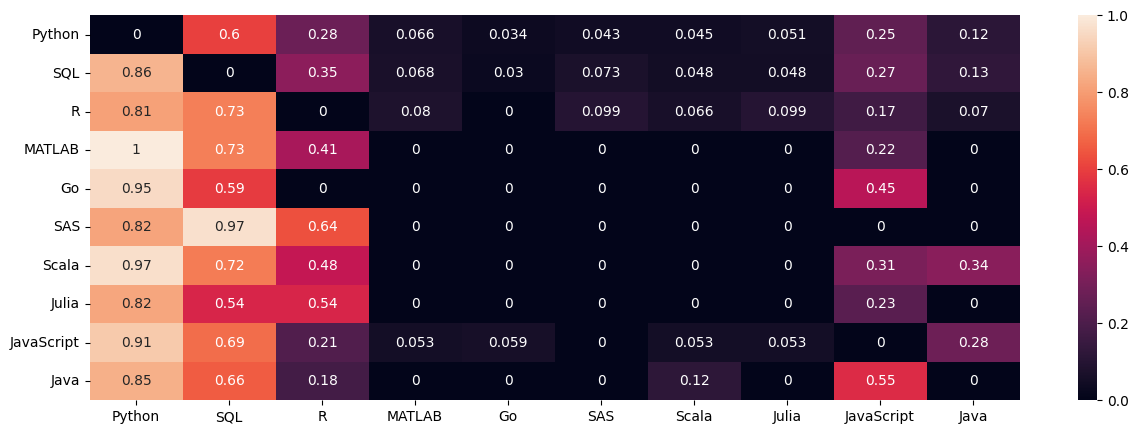

In [48]:
import seaborn as sns
plt.figure(figsize=(15, 5))
heatmap = sns.heatmap(revised_rules_df, annot=True)

In [57]:
rules_for_python = rules[
    rules.apply(lambda x: ('Python' in x['antecedents'] and len(x['antecedents']) == 1)
    , axis=1)
]
high_lift_rules_for_python = rules_for_python[rules_for_python['lift'] > 1]
fig = px.scatter(
    high_lift_rules_for_python,
    x='support',
    y='confidence',
    size='lift',
    color='lift',
    hover_data=['antecedents_str', 'consequents_str']
)
fig.update_layout(
    xaxis_title='Support',
    yaxis_title='Confidence',
    font_family='Courier New',
    font_color='blue',
    title_font_family='Times New Roman',
    title_font_color='red',
    title=('Support vs Confidence')
)